In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
pulse_len = 300
k =3.
N1 = 0.01
eps = 0.2
Lx, Lz = (3000000, 10000)



In [13]:
def tau_approx(m): 
    tau = Lx*np.pi*m**2/(2.*Lz*eps*N1*k)
    return tau
def tau_exact(m): 
    tau = tau_approx(m) + eps * (Lx/Lz) * (2. * (m*np.pi)**2 - 3.)/(12. * N1 * k * np.pi)
    return tau
def tau_off(m):
    tau = Lx*(6 + np.pi**2*m**2*(1.+3.*eps**2))/(6.*eps*N1*k*np.pi*Lz)
    return tau 


In [27]:
tau_exact(2)*1

318188.9006206738

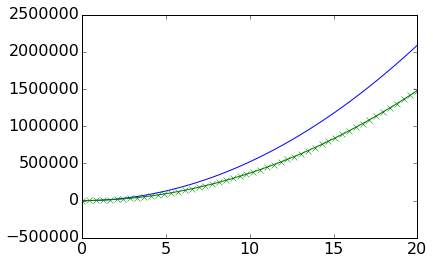

In [116]:
m = np.linspace(0,20)
plt.plot(m, tau_exact(m))
plt.plot(m, tau_off(m), marker = 'x')

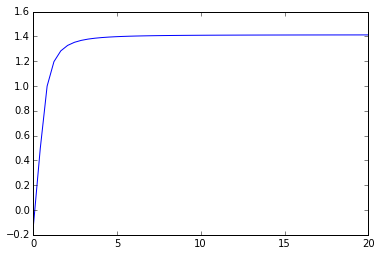

In [21]:
plt.plot(m, tau_exact(m)/tau_off(m))

In [186]:
import numpy as np
import h5py
import dedalus_plots as dp
from scipy import stats

sim_name = 'k2m1'
filepath = sim_name + "/" + sim_name + "_s1/" + sim_name + "_s1_p0.h5"
data = h5py.File(filepath, "r")
dict_vars = {'b3d':'buoyancy', 'tropenergy':'tropo energy'}

vars = dp.read_vars(data, dict_vars)
dims = dp.read_dims(data)
data.close()

#parameters
m = 1
k = 10.
N1 = 0.01
eps = 1
Lx, Lz = (2000000, 10000)


tau_approx = Lx*np.pi*m**2/(2.*Lz*eps*N1*k)
tau_exact = tau_approx + eps * (Lx/Lz) * (2. * (m*np.pi)**2 - 3.)/(12. * N1 * k * np.pi)

tau_off = Lx*(6 + np.pi**2*m**2*(1.+3.*eps**2))/(6.*eps*N1*k*np.pi*Lz)


energ_normed = vars['tropenergy'][:,0,0]/np.max(vars['tropenergy'][:,0,0])
energ_theory = np.exp(-(dims['t'] )/tau_exact)
energ_approx  = np.exp(-(dims['t'])/tau_approx)
energ_off  = np.exp(-(dims['t'] )/tau_off)

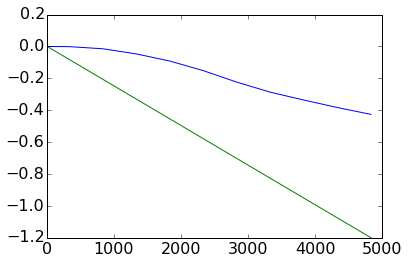

In [187]:
plt.plot(dims['t'], np.log(energ_normed))
plt.plot(dims['t'], np.log(energ_theory))

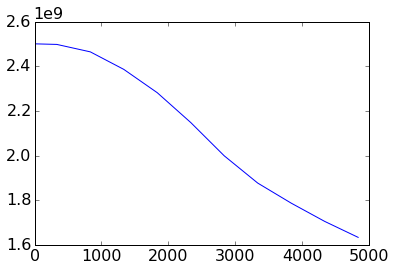

In [153]:
plt.plot(dims['t'], vars['tropenergy'][:,0,0])

In [1]:
from scipy import stats
import pickle

In [11]:
files = !ls

In [12]:
test = [i for i in files if i[-1] == 'p']

In [13]:
for a in test:
    print(a)

eps02.p
eps02_m2.p
eps03.p
eps03_m2.p
eps04.p
eps04_m2.p
eps05.p
eps05_m2.p
eps06.p
eps06_m2.p
eps07.p
eps07_m2.p
eps08.p
eps08_m2.p
eps09.p
eps09_m2.p
eps1.p
eps1_m2.p


In [24]:
biglist = []
for a in test:
    infile = open( a, 'rb')
    tmp = pickle.load(infile)
    biglist = biglist + tmp 

In [26]:
biglist[0]

{'eps': 0.2,
 'intercept': 0.03488821948901466,
 'k': 3,
 'm': 1,
 'r': -0.99348217945311446,
 'std_err': 1.6250419988868962e-07,
 'tau': 43454.098434801024,
 'tau_approx': 39269.90816987241,
 'tau_theory': 39713.92947392476}

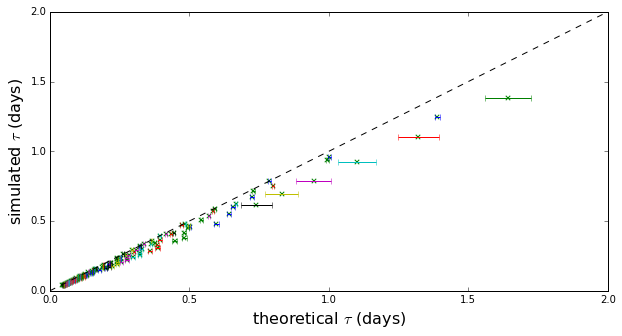

In [27]:
x = np.linspace(8,12)
x = np.linspace(0,3)
plt.figure(figsize=(10,5))
for a in biglist:
       # plt.scatter(np.log(a['tau']), np.log(a['tau_theory']), color = 'green')
        plt.scatter(a['tau']/86400., a['tau_theory']/86400., color = 'green', marker = 'x')
        plt.errorbar(a['tau']/86400., a['tau_theory']/86400.,xerr = a['std_err']*a['tau']*a['tau']/86400)
plt.plot(x,x,color = 'black', ls ='--')
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel('theoretical $\\tau$ (days)', fontsize = 16)
plt.ylabel('simulated $\\tau$ (days)', fontsize = 16)



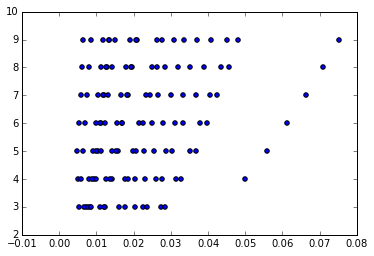

In [10]:
x = np.linspace(8,12)
x = np.linspace(0,2)
for run in biglist:
    for a in run: 
       # plt.scatter(np.log(a['tau']), np.log(a['tau_theory']), color = 'green')
       # plt.scatter(a['tau']/86400., a['tau_theory']/86400., color = 'green')
        plt.scatter(a['std_err']*a['tau'], a['k'])
#plt.plot(x,x,color = 'black', ls ='--')
#plt.xlim(0,2)
#plt.ylim(0,2)

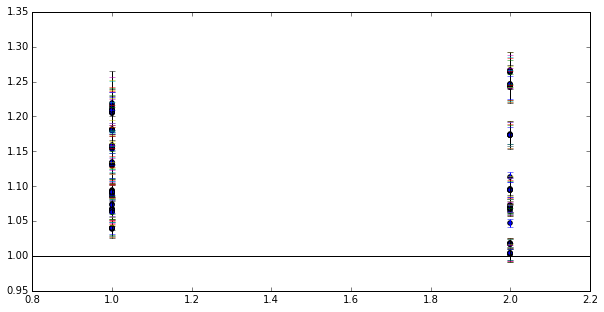

In [38]:
x = np.linspace(8,12)
x = np.linspace(0,2)
plt.figure(figsize=(10,5))
for run in biglist:
    for a in run: 
       # plt.scatter(np.log(a['tau']), np.log(a['tau_theory']), color = 'green')
        plt.scatter(a['m'], a['tau']/a['tau_theory'])
        plt.errorbar(a['m'], a['tau']/a['tau_theory'],yerr = a['std_err']*a['tau'] )
plt.axhline(y=1, xmin = 0, xmax = 1, color = 'black')
#plt.xlim(0,2)
#plt.ylim(0,2)


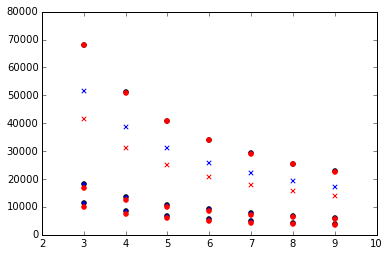

In [41]:
for a in archive_list1:
    plt.scatter(a['k'], a['tau'])
    plt.scatter(a['k'], a['tau_theory'], color= 'red')
for a in archive_list05:
    plt.scatter(a['k'], a['tau'])
    plt.scatter(a['k'], a['tau_theory'], color= 'red')
for a in archive_list05_m2:
    plt.scatter(a['k'], a['tau'])
    plt.scatter(a['k'], a['tau_theory'], color= 'red')
for a in archive_list1_m2:
    plt.scatter(a['k'], a['tau'], marker = 'x')
    plt.scatter(a['k'], a['tau_theory'],  color= 'red', marker = 'x')

(0, 20000)

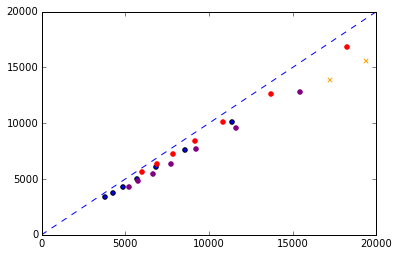

In [54]:
x = np.linspace(0,80000)
for a in archive_list1:
    plt.scatter(a['tau'], a['tau_theory'])
for a in archive_list05:
    plt.scatter(a['tau'], a['tau_theory'], color = 'red')
for a in archive_list07:
    plt.scatter(a['tau'], a['tau_theory'], color = 'purple')
for a in archive_list05_m2:
    plt.scatter(a['tau'], a['tau_theory'], color = 'green')
for a in archive_list1_m2:
    plt.scatter(a['tau'], a['tau_theory'], color = 'orange', marker = 'x')
plt.plot(x,x, ls ='--')
plt.xlim(0,20000)
plt.ylim(0,20000)

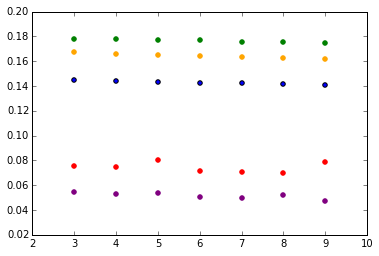

In [46]:
for a in archive_list1:
    plt.scatter(a['k'], a['intercept'])
for a in archive_list05:
    plt.scatter(a['k'], a['intercept'], color = 'red')
for a in archive_list07:
    plt.scatter(a['k'], a['intercept'], color = 'purple')
for a in archive_list05_m2:
    plt.scatter(a['k'], a['intercept'], color = 'green')
for a in archive_list1_m2:
    plt.scatter(a['k'], a['intercept'], color = 'orange')


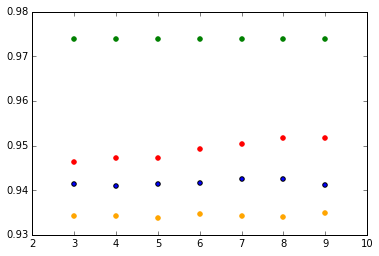

In [44]:
for a in archive_list1:
    plt.scatter(a['k'], a['r']**2)
for a in archive_list05:
    plt.scatter(a['k'], a['r']**2, color ='red')
for a in archive_list05_m2:
    plt.scatter(a['k'], a['r']**2, color ='green')
for a in archive_list1_m2:
    plt.scatter(a['k'], a['r']**2, color ='orange')

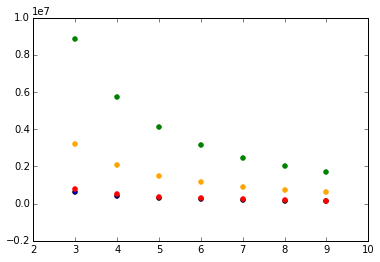

In [45]:
for a in archive_list1:
    plt.scatter(a['k'], 1./a['std_err'])
for a in archive_list05:
    plt.scatter(a['k'], 1./a['std_err'], color ='red')
for a in archive_list05_m2:
    plt.scatter(a['k'], 1./a['std_err'], color ='green')
for a in archive_list1_m2:
    plt.scatter(a['k'], 1./a['std_err'], color ='orange')
